In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns

reviewsDF = pd.read_csv("../data/data_clean_bnb.csv")
reviewsDF.head()

,id,name,description,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_total_listings_count,neighbourhood,neighbourhood_cleansed,...,minimum_nights,maximum_nights,has_availability,availability_365,calendar_last_scraped,number_of_reviews,review_scores_rating,review_scores_location,review_scores_value,index
0,999067.0,"The Stables, Richmond",Superbly located hotel style accommodation in ...,Ione,within an hour,100%,98%,2.0,"Richmond, Victoria, Australia",Yarra,...,2,14,True,12,3/14/2023,741,4.88,4.93,4.82,1
1,10803.0,Room in Cool Deco Apartment in Brunswick East,A large air conditioned room with firm queen s...,Lindsay,within a few hours,100%,98%,1.0,"Brunswick East, Victoria, Australia",Moreland,...,4,27,True,112,3/14/2023,169,4.48,4.65,4.60,2
2,38271.0,Melbourne - Old Trafford Apartment,After hosting many guests from all over the wo...,Daryl & Dee,within a few hours,100%,87%,1.0,"Berwick, Victoria, Australia",Casey,...,1,14,True,312,3/13/2023,214,4.86,4.90,4.87,3
3,1002094.0,Heart of the CBD,<b>The space</b><br />Spacious apartment fully...,Jacqui And David,within an hour,100%,96%,5.0,"Melbourne, Victoria, Australia",Melbourne,...,4,1125,True,323,3/14/2023,122,4.86,4.96,4.87,4
4,297350.0,"Best, west of Melbourne-Wifi & Spa1",Ask for availability if you want to book multi...,Ryan,within an hour,100%,88%,23.0,"Derrimut, Victoria, Australia",Brimbank,...,1,1124,True,326,3/13/2023,301,4.76,4.59,4.77,5


In [2]:
#Interpreting the relation between number of reviews and prices


inputDF = pd.read_csv('../data/data_clean_bnb.csv')
inputDF=inputDF[['number_of_reviews','price','review_scores_rating']]

inputDF

,number_of_reviews,price,review_scores_rating
0,741,132,4.88
1,169,39,4.48
2,214,116,4.86
3,122,174,4.86
4,301,47,4.76
...,...,...,...
995,42,71,5.00
996,164,199,4.93
997,144,141,4.69
998,72,172,4.93


In [3]:
price_review = inputDF[['number_of_reviews', 'price']].sort_values(by = 'price')

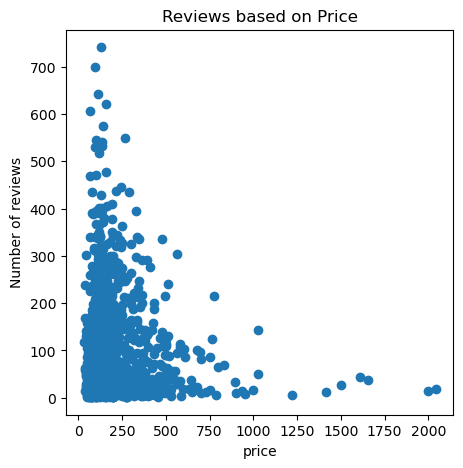

In [4]:
import matplotlib
import matplotlib.pyplot as plt

price_review.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(5,5),
                  legend = False,
                  title = 'Reviews based on Price')

plt.xlabel("price")
plt.ylabel("Number of reviews")

plt.savefig("../Images/Reviews_based_on_Price.png")

In [5]:
#From the graph, the reviews were most observed for the listings that have a price range around $100 - 800. The number quickly declines as the price goes up.
#It shows that, there is no necessity for an expensive listing to have more reviews.
#Hence, the Prices have no relation with the Number of reviews.

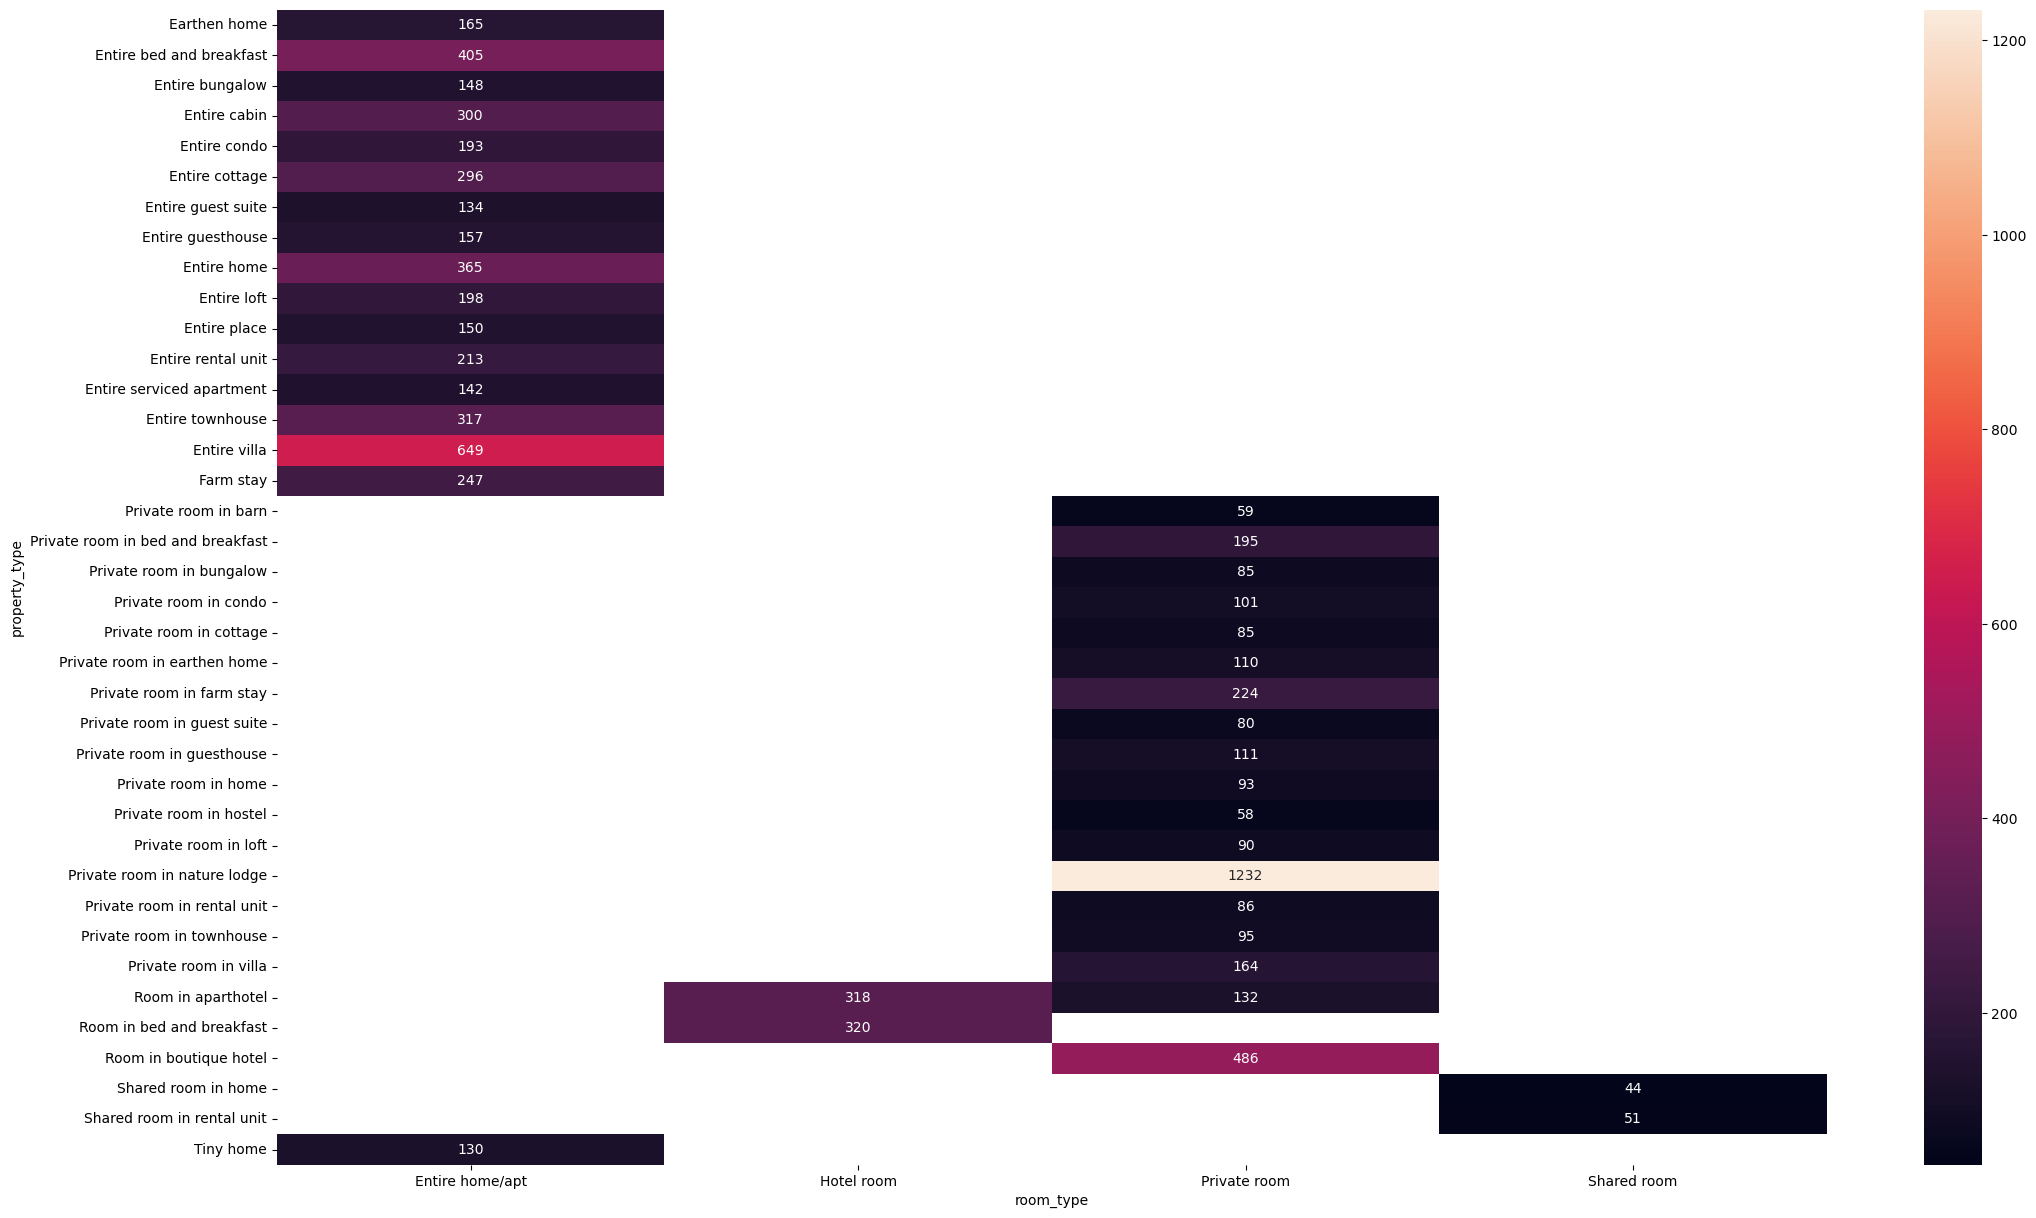

In [6]:
#Plotting relationship between Price, Property_Type and Room Type on a heatMap

import seaborn as sns
data = pd.read_csv('../data/data_clean_bnb.csv')

plt.figure(figsize=(25,15))
sns.heatmap(data.groupby(['property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")

plt.savefig("../Images/Price_type.png")

In [7]:
#It can be analyzed that for almost all property type,prices for Entire home/apartment are the maximum.
#This tells us that Property type and room type plays a very important role in deciding price of a listing.

In [8]:
#Grouping neighbourhood
#By number of listings

neighbourhood_DF=data.groupby('neighbourhood_cleansed').id.count()
neighbourhood_DF=neighbourhood_DF.reset_index()
neighbourhood_DF=neighbourhood_DF.rename(columns={'id':'Number_Of_Listings'})
neighbourhood_DF=neighbourhood_DF.sort_values('Number_Of_Listings',ascending=[0])
neighbourhood_DF.head()

,neighbourhood_cleansed,Number_Of_Listings
17,Melbourne,200
22,Port Phillip,175
27,Yarra Ranges,108
26,Yarra,99
23,Stonnington,89


In [9]:
#By average price of listings

neighbourhoodPrice_DF=data.groupby('neighbourhood_cleansed').price.mean()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.reset_index()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.rename(columns={'price':'Average_Price'})
neighbourhoodPrice_DF=neighbourhoodPrice_DF.sort_values('Average_Price',ascending=[0])
neighbourhoodPrice_DF.head()

,neighbourhood_cleansed,Average_Price
27,Yarra Ranges,336.870370
1,Bayside,289.117647
7,Frankston,287.000000
16,Maroondah,274.166667
17,Melbourne,235.645000


In [10]:
#Merging above two dataframes

mergeDF=pd.merge(neighbourhood_DF,neighbourhoodPrice_DF,on='neighbourhood_cleansed')
mergeDF.head()

,neighbourhood_cleansed,Number_Of_Listings,Average_Price
0,Melbourne,200,235.645000
1,Port Phillip,175,210.685714
2,Yarra Ranges,108,336.870370
3,Yarra,99,213.050505
4,Stonnington,89,199.483146


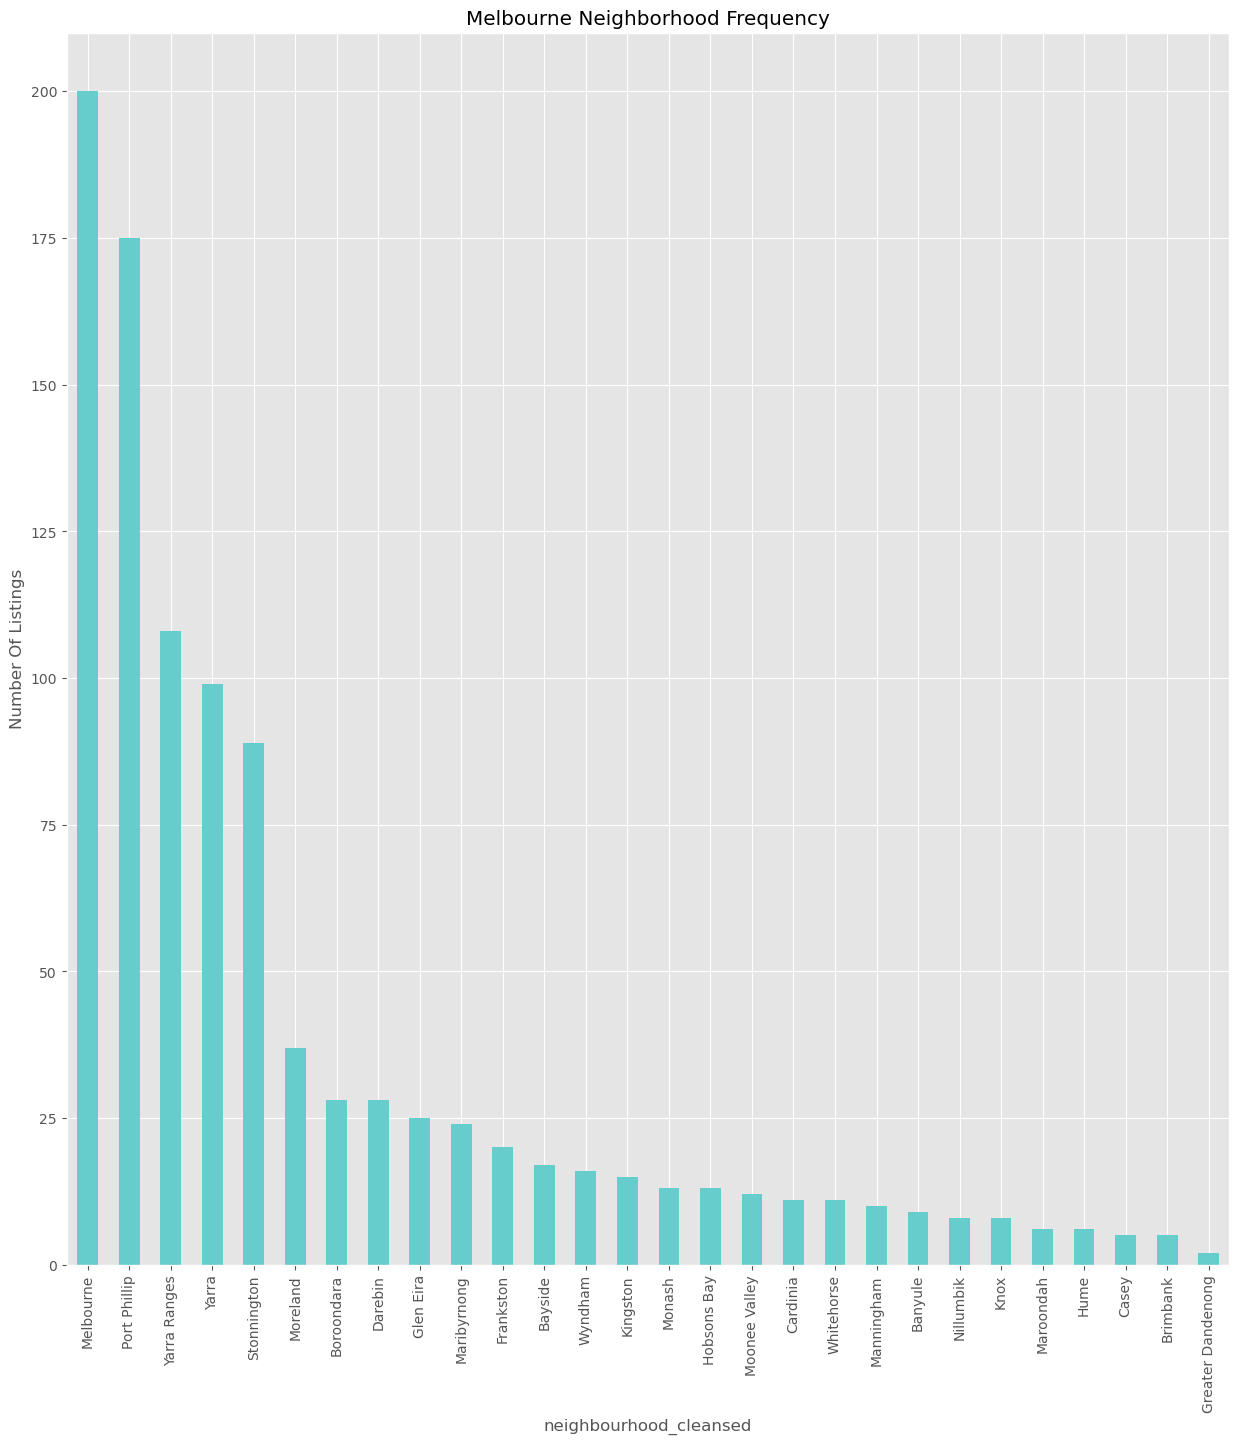

In [11]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

objects = neighbourhood_DF['neighbourhood_cleansed']
y_pos = neighbourhood_DF['Number_Of_Listings']

neighbourhood_DF.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Number_Of_Listings',
           color = '#66cccc', 
           figsize =(15,16), 
           title = 'Melbourne Neighborhood Frequency', 
           legend = False)

plt.ylabel('Number Of Listings')

plt.savefig("../Images/Melbourne_Neighborhood_Frequency.png")

In [12]:
#It can be noticed that the maximum number of listings for entire apartment are in Melbourne area followed by Port Phillip and Yarra.
#So these area become potential neighbourhood to invest a property